In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

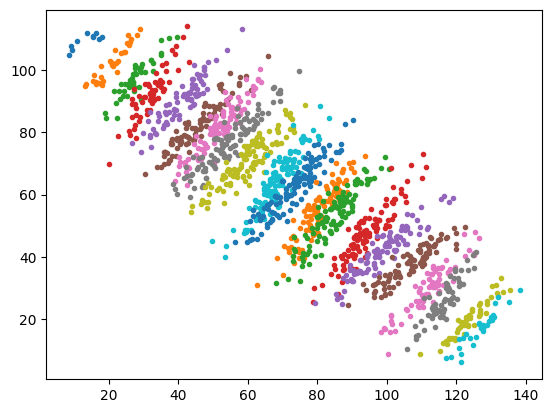

In [3]:
groups = []
all_x = []
n_groups = 20
maxi = 120
for i in range(n_groups):
    cx = np.random.rand()*(0.8*maxi/n_groups) + (maxi/n_groups)*i + 0.1*maxi
    cy = maxi - 0.8*cx + np.random.randn()*0.5
    r = 1+5*i*(n_groups-i)/(n_groups**2)
    theta = np.pi/3.5 + np.random.randn()*0.1
    n = i*(n_groups-i) + 10
    x = np.random.randn(n, 2)
    x[:,0] *= 5
    x *= r
    R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]).T
    x = x.dot(R)
    x[:,0] += cx
    x[:,1] += cy

    group = {"cx": cx, "cy": cy, "r": r, "theta": theta, "n": n, "x": x}
    # print(group)
    groups.append(group)

    plt.plot(x[:,0], x[:,1], '.')
    all_x.append(x)
plt.show()